# Modelo de predicción para la retención de clientes para el banco Beta Bank

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Análisis exploratorio de datos](#data_review)
    * [Inicialización](#initialization)
    * [Cargar datos](#upload_data)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [Datos Ausentes](#missing_data)
    * [Estandarización de los datos](#data_standardization)
* [Etapa 3. Examinacion de equilibrio de clases](#class_balance_examination)
* [Etapa 4. Segmentación de conjuntos de datos](#split_data)
    * [Escalado de características](#feature_scaling)
* [Etapa 5. Evaluación de modelos](#models_evaluation)
* [Etapa 6. Sobremuestreo](#upsampled)
* [Etapa 7. Submuestreo](#downsampled)
* [Etapa 8. Pruebas de calidad de los modelos](#model_test)
* [Etapa 9. Prueba de cordura al modelo](#sanity_test)
* [Conclusión general](#end)

# Introducción<a id='intro'></a>

Tras tener acceso a los datos del comportamiento de los clientes del banco Beta Bank se plantea desarrollar un modelo que pueda predecir si un cliente dejará el banco pronto.

El desarrollo del modelo debe tener el mayor de la metrica F1 posible. En este proyecto, el umbral del valor F1 debe ser de por lo menos 0.59.

# Etapa 1. Análisis exploratorio de datos<a id='data_review'></a>

## Inicialización<a id='initialization'></a>

In [1]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

[Volver a Contenidos](#back)

## Cargar datos<a id='upload_data'></a>

In [2]:
df = pd.read_csv("./datasets/Churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
df.info()
print("\nDatos Duplicados: ", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

Datos Duplicados:  0


### Conclusiones

Al estudiar los datos del df podemos ver que se trata de 14 columnas (numero de fila, id del cliente, apellido del cliente, valor de crédito, país de residencia, sexo, edad, período durante el cual ha madurado el depósito a plazo fijo de un cliente (años), saldo de la cuenta, número de productos bancarios utilizados por el cliente, si el cliente tiene una tarjeta de crédito o no, si es un cliente activo o no, salario estimado y si el cliente se ha ido o no). 

Teniendo 10,000 filas, ese decir 10,000 clientes, no presenta datos ausentes en la mayoria de columnas a excepcion de la columna 'tenure', y los tipos de datos de cada columna están correctos. De igual forma también no presenta datos duplicados, aunque se puede convertir los nombres de las columnas en minuscula y con guion bajo en caso de que sea mas de una palabra.

[Volver a Contenidos](#back)

# Etapa 2. Preprocesamiento de datos<a id='data_preprocessing'></a>

En esta etapa se plantea preprocesar todos los datos del df, como convertir en minuscula los nombres de las columnas, rellenar ciertos valores ausentes, etc.

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
#Creamos una funcion para la conversion a minuscula de todos los nombres de las columnas
def clean_data_columns(data):
    clean_columns = []
    for column in data.columns:
        name_lowered = column.lower()
        clean_columns.append(name_lowered)
    return clean_columns

df.columns = clean_data_columns(df)
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [6]:
#Mediante un diccionario renombramos con guion bajo aquellas columnas que tengan mas de una palabra
name_columns = {"rownumber": "row_number","customerid": "customer_id","surname": "sur_name","creditscore": "credit_score","numofproducts": "num_of_products","hascrcard": "has_cr_card","isactivemember": "is_active_member","estimatedsalary": "estimated_salary","exited": "exited"}

df.rename(columns=name_columns, inplace=True)

df

,row_number,customer_id,sur_name,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## Datos Ausentes<a id='missing_data'></a>

Debido a que se presentan datos ausentes en la columna tenure, se rellenaran los datos ausentes realizando una agrupacion por su pais de residencia, sexo y obteniendo la mediana respectiva de estos.

In [7]:
#Obtenemos todos los valores unicos que hay en esa columna
df['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [8]:
#Obtenemos la mediana de la agrupacion entre las columnas geography y gender
print("Mediana:")
print(df.groupby(['geography', 'gender'])['tenure'].median())

Mediana:
geography  gender
France     Female    5.0
           Male      5.0
Germany    Female    5.0
           Male      5.0
Spain      Female    5.0
           Male      5.0
Name: tenure, dtype: float64


In [9]:
#Mediante los metodos fillna y transform rellenamos los valores ausentes con la mediana
df['tenure'].fillna(df.groupby(['geography', 'gender'])['tenure'].transform('median'), inplace=True)
df

C:\Users\rodri\AppData\Local\Temp\ipykernel_5660\2740789426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure'].fillna(df.groupby(['geography', 'gender'])['tenure'].transform('median'), inplace=True)


,row_number,customer_id,sur_name,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   sur_name          10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


[Volver a Contenidos](#back)

## Estandarización de los datos <a id='data_standardization'></a>

In [11]:
#Desechamos las columnas que son irrelevantes para los modelos
df.drop(['row_number', 'customer_id', 'sur_name'], axis=1, inplace=True)
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [12]:
#Mediante el metodo get_dummies realizamos la estandarizacion de los datos enfocandonos en las columnas geography y sex
df_ohe = pd.get_dummies(df, drop_first=True, dtype='int')
df_ohe

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  int64  
 10  geography_Spain    10000 non-null  int64  
 11  gender_Male        10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


### Conclusiones
Al preprocesar los datos realizamos las siguientes tareas: rellenar los valores ausentes correspondientes de la columna tenure con la mediana al agrupar los datos de pais de residencia y sexo, desechar columnas (row_number, customer_id, sur_name) que no aportan informacion relevante para los modelos. Y finalmente estandarizamos los datos del df, enfocandonos las columnas de pais de residencia y sexo los cuales eran columnas categoricas y ahoran son numericas mostrando como por ejemplo en la nueva columna gender_male la cual marca 1 si es hombre o marca 0 si es mujer.

[Volver a Contenidos](#back)

# Etapa 3. Examinacion de equilibrio de clases<a id='class_balance_examination'></a>

In [14]:
df_ohe['exited'].value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

### Conclusiones

Al obtener el conteo de los valores de la columna exited podemos ver una claro desequilibrio de clases, donde la clase 0 tiene una mayor frecuencia que la clase 1, por lo tanto en primera instancia se entrenaran los modelos sin tomar en cuenta este desequilibrio y evaluar esos resultados para despues aplicar tecnicas como el sobremuestreo y el submuestreo para comparar los resultados de los modelos.

[Volver a Contenidos](#back)

# Etapa 4. Segmentación de conjuntos de datos<a id='split_data'></a>

In [15]:
# Definimos las caracteristicas y el objetivo
features = df_ohe.drop('exited', axis=1) 
target = df_ohe['exited']

In [16]:
# Separamos los datos en conjuntos de entrenamiento, validación y prueba
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.25, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345) 

In [17]:
print(features_train.shape)
print(target_train.shape)
print(features_valid_test.shape)
print(target_valid_test.shape)

(7500, 11)
(7500,)
(2500, 11)
(2500,)


In [18]:
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(1250, 11)
(1250,)
(1250, 11)
(1250,)


## Escalado de características<a id='feature_scaling'></a>

Debido a que trabajaremos con los modelos de arbol de decisiones, bosque aleatorio y regresion logistica, en el caso de la regresion logistica escalaremos los datos para este modelo especificamente ya que calcula la probabilidad de una clase mediante una combinación lineal de las características tiene sensibilidad ante los rangos de los valores, es decir que alguna caracteristica tiene valores mucho mas que grandes que otras, como por ejemplo los valores de la columna balance antes las demas columnas.

In [19]:
#Creamos una lista de las columnas para el escalado
numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary']
#Creamos una instancia del StandardScaler
scaler = StandardScaler()

#Realizamos una copia de los datos de caracteristicas ylos alamcenamos como nuevas variables
features_train_scaled = features_train.copy()
features_valid_scaled = features_valid.copy()
features_test_scaled = features_test.copy()

#Escalamos los datos con las caracteristicas de entrenamiento y transformamos los conjuntos de entrenamiento, validacion y de pruebas
scaler.fit(features_train_scaled[numeric_cols])

features_train_scaled[numeric_cols] = scaler.transform(features_train[numeric_cols])
features_valid_scaled[numeric_cols] = scaler.transform(features_valid[numeric_cols])
features_test_scaled[numeric_cols] = scaler.transform(features_test[numeric_cols])

### Conclusiones

Podemos observar como mediante la function train_test_split es posible dividir los datos en primera instancia un 75% de entrenamiento y un 25% de validacion, el cual del conjunto de datos de validacion separamos los datos de nuevo a la mitad obteniendo 12.5% de validacion y 12.5% de prueba. De igual forma mediante StandardScaler escalamos los datos para el modelo de regresion logisticas ya que es sensible ante el rango de valores de las caracteristicas.

[Volver a Contenidos](#back)

# Etapa 5. Evaluación de modelos<a id='models_evaluation'></a>

## Arbol de Decision (Ignorando el desequilibrio)

In [20]:
decision_tree_best_model = None
best_result = 0
best_depth = 0
# seleccionamos el rango del hiperparámetro, la profundidad de 1 a 10
for depth in range(1, 10):  
    # creamos el modelo, configuramos la aleatoriedad y la profundidad de maxima del arbol
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
    model_tree.fit(features_train, target_train)
    # realizamos la prediccion con las caracteristicas de validacion
    valid_predictions = model_tree.predict(features_valid)
    print("F1 de max_depth igual a", depth)
    # calculamos la puntuación de f1 en el conjunto de validacion
    result = f1_score(target_valid, valid_predictions)
    print("Conjunto de validación:", result)
    print()
    # evaluamos que modelo tiene el mejor resultado (f1) y lo almacenamos, junto con la profundidad de ese arbol
    if result > best_result:
        decision_tree_best_model = model_tree
        best_result = result
        best_depth = depth
        
print(f"El F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

F1 de max_depth igual a 1
Conjunto de validación: 0.0

F1 de max_depth igual a 2
Conjunto de validación: 0.5431034482758621

F1 de max_depth igual a 3
Conjunto de validación: 0.45528455284552843

F1 de max_depth igual a 4
Conjunto de validación: 0.48936170212765956

F1 de max_depth igual a 5
Conjunto de validación: 0.5747663551401869

F1 de max_depth igual a 6
Conjunto de validación: 0.5487179487179488

F1 de max_depth igual a 7
Conjunto de validación: 0.5476772616136919

F1 de max_depth igual a 8
Conjunto de validación: 0.52

F1 de max_depth igual a 9
Conjunto de validación: 0.5370370370370371

El F1 del mejor modelo en el conjunto de validación (max_depth = 5): 0.5747663551401869


## Bosque Aleatorio (Ignorando el desequilibrio)

In [21]:
random_forest_best_model = None
best_result = 0
best_est = 0
best_depth = 0
# seleccionamos el rango del hiperparámetro, estimadores de 10 a 50, de 10 en 10
# y la profundidad de 1 a 10
for est in range(10, 51, 10):
    for depth in range (1, 11):
        # configuramos la aleatoriedad, los estimadores y la profundidad maxima del bosque aleatorio con los parámetros random_state=12345, n_estimators=est y max_depth=depth
        model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
        model_random_forest.fit(features_train, target_train)
        # realizamos la prediccion con las caracteristicas de validacion
        valid_predictions = model_random_forest.predict(features_valid)
        # calculamos la puntuación de f1 en el conjunto de validacion
        result = f1_score(target_valid, valid_predictions)
        print("F1 de modelo para los n_estimators de", est, ", depth=", depth, "es: ", result, "\n")
        # evaluamos que modelo tiene el mejor resultado (f1) y lo almacenamos, junto con los estimadores y la profundidad de ese arbol
        if result > best_result:
            random_forest_best_model = model_random_forest
            best_result = result
            best_est = est
            best_depth = depth

print(f"El F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth} y n_estimators = {best_est}): {best_result}")

F1 de modelo para los n_estimators de 10 , depth= 1 es:  0.0 

F1 de modelo para los n_estimators de 10 , depth= 2 es:  0.22073578595317725 

F1 de modelo para los n_estimators de 10 , depth= 3 es:  0.24422442244224424 

F1 de modelo para los n_estimators de 10 , depth= 4 es:  0.46866485013623976 

F1 de modelo para los n_estimators de 10 , depth= 5 es:  0.5026737967914439 

F1 de modelo para los n_estimators de 10 , depth= 6 es:  0.518324607329843 

F1 de modelo para los n_estimators de 10 , depth= 7 es:  0.5620253164556962 

F1 de modelo para los n_estimators de 10 , depth= 8 es:  0.5664160401002506 

F1 de modelo para los n_estimators de 10 , depth= 9 es:  0.5412371134020618 

F1 de modelo para los n_estimators de 10 , depth= 10 es:  0.5594059405940595 

F1 de modelo para los n_estimators de 20 , depth= 1 es:  0.0 

F1 de modelo para los n_estimators de 20 , depth= 2 es:  0.20945945945945946 

F1 de modelo para los n_estimators de 20 , depth= 3 es:  0.24918032786885247 

F1 de model

## Regresion Logistica (Ignorando el desequilibrio)

In [22]:
# creamos el modelo, configuramos la aleatoriedad y ajustamos el algoritmo solver a liblinear
model_logistic_regression_scaled = LogisticRegression(random_state=12345, solver='liblinear')
# entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
model_logistic_regression_scaled.fit(features_train_scaled, target_train)
# realizamos la prediccion con las caracteristicas de validacio
valid_predictions_scaled = model_logistic_regression_scaled.predict(features_valid_scaled)
result = f1_score(target_valid, valid_predictions_scaled)
print("F1 del modelo de regresión logística en el conjunto de validación:", result)

F1 del modelo de regresión logística en el conjunto de validación: 0.3008356545961003


### Conclusiones

Al tratarse de un caso de clasificacion por lo tanto se entrenaron 3 modelos, los cuales se entrenaron con los datos de entrenamiento y realizaron predicciones mediante los datos de validacion, de las cuales para calcular el valor de F1 se uso la funcion f1_score:

* Arbol de decision: El cual se utilizaron valores de profundidad del arbol de 1 a 10, siendo la profundidad 5 con el mejor valor F1 en los datos validacion de: 0.5747 

* Bosque aleatorio: El cual se utilizaron valores de profundidad de 1 a 10 con estimadores de 10 a 50 y de 10 en 10, siendo la profundidad 10 y el estimador 40 con el mejor valor F1 en los datos validacion de: 0.5829

* Regresion logistica: El cual se utilizo con el parametro solver='liblinear' al tratarse de clasificacion binaria y se obtuvo el valor F1 en los datos validacion de: 0.3008

Con todo esto podemos que observar que aunque el modelo de bosque aleatorio se presento como el modelo con el mayor valor de F1, la verdad es que la puntuaciones resultaron un poco bajas para todos los moedelos sobretodo el de regresion logistica, y tambien mencionar que ninguno paso ya que ningun obtuvo una puntuacion de F1 mayor a 0.59. Significando que se debe aplicar tecnicas (sobremuestreo y submuestreo) ante el desequilibrio de las clases del objetivo para poder aumentar la punticacion del valor F1.

[Volver a Contenidos](#back)

# Etapa 6. Sobremuestreo<a id='upsampled'></a>

In [23]:
#Creamos una funcion para el sobremuestreo el cual recibira como parametros las caracteristicas, el objetivo y la repeticion
def upsample(features, target, repeat):
    #Dividimos el dataset de entrenamiento en observaciones negativas y positivas
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    #Duplicamos varias veces las observaciones positivas que son las que tienen menor frecuencia
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    #Se crea una nueva muestra de entrenamiento donde mediante la funcion shuffle se mezclaran dichos datos
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    #Retornamos la nueva muestra de entrenamiento
    return features_upsampled, target_upsampled

In [24]:
#Llamamos la funcion pasandole los argumentos de caracteristicas y objetivo de entrenamiento y el valor de la repeticion
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

Para el caso de la regresion logistica le pasamos las caracteristicas de entrenamiento escaladas, para seguir trabajando con el escalado de los datos debido a la sensibilidad del modelo

In [25]:
#Llamamos la funcion pasandole los argumentos de caracteristicas y objetivo de entrenamiento y el valor de la repeticion
features_log_upsampled, target_log_upsampled = upsample(features_train_scaled, target_train, 3)

## Arbol de Decision (Sobremuestreo)

In [26]:
decision_tree_best_model_upsample = None
best_result_tree_upsample = 0
best_depth_tree_upsample = 0
# seleccionamos el rango del hiperparámetro, la profundidad de 1 a 10
for depth in range(1, 10):  
    # creamos el modelo, configuramos la aleatoriedad y la profundidad de maxima del arbol
    model_tree_upsample = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
    model_tree_upsample.fit(features_upsampled, target_upsampled)
    # realizamos la prediccion con las caracteristicas de validacion
    valid_predictions = model_tree_upsample.predict(features_valid)
    print("F1 de max_depth igual a", depth)
    # calculamos la puntuación de f1 en el conjunto de validacion
    result = f1_score(target_valid, valid_predictions)
    print("Conjunto de validación:", result)
    print()
    # evaluamos que modelo tiene el mejor resultado (f1) y lo almacenamos, junto con la profundidad de ese arbol
    if result > best_result_tree_upsample:
        decision_tree_best_model_upsample = model_tree_upsample
        best_result_tree_upsample = result
        best_depth_tree_upsample = depth

        
print(f"El F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth_tree_upsample}): {best_result_tree_upsample}")


F1 de max_depth igual a 1
Conjunto de validación: 0.4864

F1 de max_depth igual a 2
Conjunto de validación: 0.5314900153609831

F1 de max_depth igual a 3
Conjunto de validación: 0.5574468085106383

F1 de max_depth igual a 4
Conjunto de validación: 0.5909090909090909

F1 de max_depth igual a 5
Conjunto de validación: 0.6208053691275168

F1 de max_depth igual a 6
Conjunto de validación: 0.5945945945945946

F1 de max_depth igual a 7
Conjunto de validación: 0.6232394366197183

F1 de max_depth igual a 8
Conjunto de validación: 0.5974842767295597

F1 de max_depth igual a 9
Conjunto de validación: 0.5738831615120275

El F1 del mejor modelo en el conjunto de validación (max_depth = 7): 0.6232394366197183


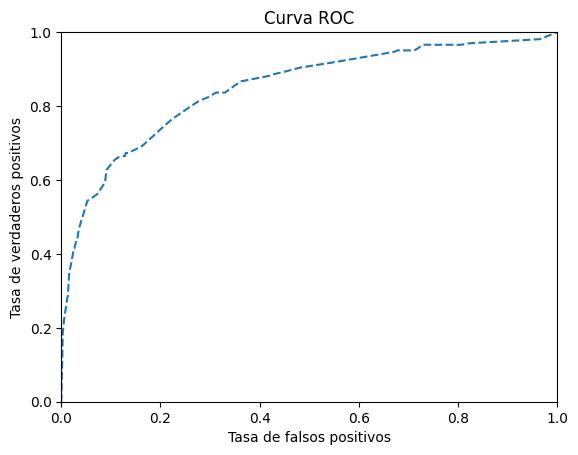

Valor del AUC-ROC 0.847554327936174


In [27]:
#Calculamos la probabilidad de que cada observacion pertenezca a cada clase posible
probabilities_valid_tree_upsample = decision_tree_best_model_upsample.predict_proba(features_valid)
probabilities_one_valid_tree_upsample = probabilities_valid_tree_upsample[:, 1]

#Trazamos la grafica de la curva roc con la fucion roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree_upsample)

plt.figure()


#Curva ROC para el modelo, trazamos la grafica con las variables fpr (valores TFP) y tpr (valores TVP)
plt.plot(fpr, tpr, linestyle='--')

#Establecemos el límite para los ejes de 0 a 1
plt.xlim([0, 1])
plt.ylim([0, 1])


#Nombramos los ejes y al titulo
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")

plt.show()

#Mediante la funcion roc_auc_score obtenemos el valor del area bajo la curva roc (AUC-ROC)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_tree_upsample)

print("Valor del AUC-ROC", auc_roc)

## Bosque Aleatorio (Sobremuestreo)

In [28]:
random_forest_best_model_upsample = None
best_result_forest_upsample = 0
best_est_forest_upsample = 0
best_depth_forest_upsample = 0
# seleccionamos el rango del hiperparámetro, estimadores de 10 a 50, de 10 en 10
# y la profundidad de 1 a 10
for est in range(10, 51, 10):
    for depth in range (1, 11):
        # configuramos la aleatoriedad, los estimadores y la profundidad maxima del bosque aleatorio con los parámetros random_state=12345, n_estimators=est y max_depth=depth
        model_random_forest_upsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
        model_random_forest_upsample.fit(features_upsampled, target_upsampled)
        # realizamos la prediccion con las caracteristicas de validacion
        valid_predictions = model_random_forest_upsample.predict(features_valid)
        # calculamos la puntuación de f1 en el conjunto de validacion
        result = f1_score(target_valid, valid_predictions)
        print("F1 de modelo para los n_estimators de", est, ", depth=", depth, "es: ", result, "\n")
        # evaluamos que modelo tiene el mejor resultado (f1) y lo almacenamos, junto con los estimadores y la profundidad de ese arbol
        if result > best_result_forest_upsample:
            random_forest_best_model_upsample = model_random_forest_upsample
            best_result_forest_upsample = result
            best_est_forest_upsample = est
            best_depth_forest_upsample = depth

print(f"El F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth_forest_upsample} y n_estimators = {best_est_forest_upsample}): {best_result_forest_upsample}")

F1 de modelo para los n_estimators de 10 , depth= 1 es:  0.2588996763754045 

F1 de modelo para los n_estimators de 10 , depth= 2 es:  0.5806451612903226 

F1 de modelo para los n_estimators de 10 , depth= 3 es:  0.603290676416819 

F1 de modelo para los n_estimators de 10 , depth= 4 es:  0.6189555125725339 

F1 de modelo para los n_estimators de 10 , depth= 5 es:  0.6346863468634686 

F1 de modelo para los n_estimators de 10 , depth= 6 es:  0.6456400742115028 

F1 de modelo para los n_estimators de 10 , depth= 7 es:  0.6454033771106942 

F1 de modelo para los n_estimators de 10 , depth= 8 es:  0.6691312384473198 

F1 de modelo para los n_estimators de 10 , depth= 9 es:  0.6493506493506493 

F1 de modelo para los n_estimators de 10 , depth= 10 es:  0.6252354048964218 

F1 de modelo para los n_estimators de 20 , depth= 1 es:  0.3817663817663818 

F1 de modelo para los n_estimators de 20 , depth= 2 es:  0.5758754863813229 

F1 de modelo para los n_estimators de 20 , depth= 3 es:  0.61224

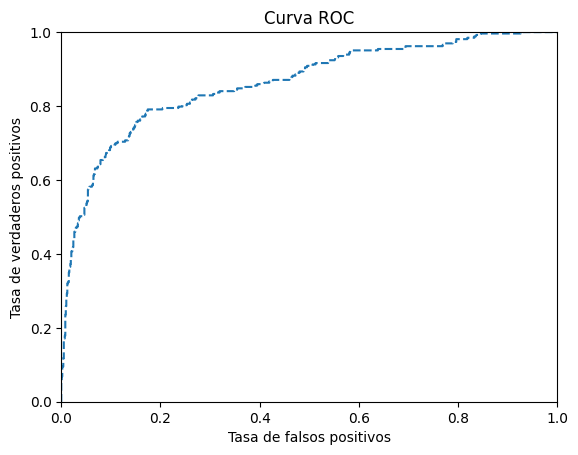

Valor del AUC-ROC 0.8616655302198544


In [29]:
#Calculamos la probabilidad de que cada observacion pertenezca a cada clase posible
probabilities_valid_forest_upsample = random_forest_best_model_upsample.predict_proba(features_valid)
probabilities_one_valid_forest_upsample = probabilities_valid_forest_upsample[:, 1]

#Trazamos la grafica de la curva roc con la fucion roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest_upsample)

plt.figure()

#Curva ROC para el modelo, trazamos la grafica con las variables fpr (valores TFP) y tpr (valores TVP)
plt.plot(fpr, tpr, linestyle='--')

#Establecemos el límite para los ejes de 0 a 1
plt.xlim([0, 1])
plt.ylim([0, 1])

#Nombramos los ejes y al titulo
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")

plt.show()

#Mediante la funcion roc_auc_score obtenemos el valor del area bajo la curva roc (AUC-ROC)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_forest_upsample)

print("Valor del AUC-ROC", auc_roc)

## Regresion Logistica (Sobremuestreo)

In [30]:
# creamos el modelo, configuramos la aleatoriedad y ajustamos el algoritmo solver a liblinear
model_logistic_regression_upsample = LogisticRegression(random_state=12345, solver='liblinear')
# entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
model_logistic_regression_upsample.fit(features_log_upsampled, target_log_upsampled)
# realizamos la prediccion con las caracteristicas de validacion
valid_predictions_log_upsampled = model_logistic_regression_upsample.predict(features_valid_scaled)
result_log_upsampled = f1_score(target_valid, valid_predictions_log_upsampled)
print("F1 del modelo de regresión logística en el conjunto de validación:", result_log_upsampled)

F1 del modelo de regresión logística en el conjunto de validación: 0.5194401244167963


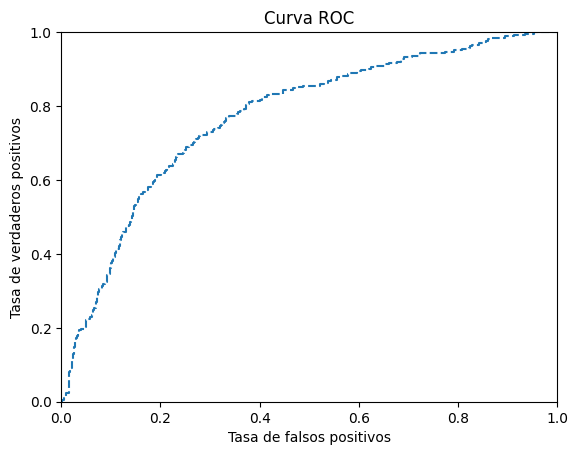

Valor del AUC-ROC 0.7698637419533786


In [31]:
#Calculamos la probabilidad de que cada observacion pertenezca a cada clase posible
probabilities_valid_log = model_logistic_regression_upsample.predict_proba(features_valid_scaled)
probabilities_one_valid_log = probabilities_valid_log[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_log)

plt.figure()


#Curva ROC para el modelo, trazamos la grafica con las variables fpr (valores TFP) y tpr (valores TVP)
plt.plot(fpr, tpr, linestyle='--')

#Establecemos el límite para los ejes de 0 a 1
plt.xlim([0, 1])
plt.ylim([0, 1])

#Nombramos los ejes y al titulo
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")

plt.show()

#Mediante la funcion roc_auc_score obtenemos el valor del area bajo la curva roc (AUC-ROC)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_log)

print("Valor del AUC-ROC", auc_roc)

### Conclusiones

Al aplicar la tecnica del sobremuestreo obtenemos lo siguiente:

* Arbol de decision: El cual se utilizaron valores de profundidad del arbol de 1 a 10, siendo la profundidad 7 con el mejor valor F1 en los datos validacion de 0.6232 y con un valor de AUC-ROC de 0.8475

* Bosque aleatorio: El cual se utilizaron valores de profundidad de 1 a 10 con estimadores de 10 a 50 y de 10 en 10, siendo la profundidad 8 y el estimador 10 con el mejor valor F1 en los datos validacion de 0.6691 y con un valor de AUC-ROC de 0.8616

* Regresion logistica: El cual se utilizo con el parametro solver='liblinear' al tratarse de clasificacion binaria y se obtuvo el valor F1 en los datos validacion de 0.5194 y con un valor de AUC-ROC de 0.7698

En esta ocasion podemos observar como los modelos de arbol de decisiones y bosque aleatorio pasaron al obenter un valor F1 mayor a 0.59, con 0.6232 y 0.6691 respectivamente. Siendo el modelo de regresion logistica como el unico que no obtuvo una puntuacion mayor a 0.59 siendo 0.5194. En general se observa un incremento en los valores F1 de los modelos tras el sobremuestreo, mostrando como el modelo de bosque aleatorio tiene la mayor puntuacion y ademas tambien teniendo el mayor valor AUC-ROC que los demas con una puntacion de AUC-ROC de 0.8616

# Etapa 7. Submuestreo<a id='downsampled'></a>

In [32]:
#Creamos una funcion para el sobremuestreo el cual recibira como parametros las caracteristicas, el objetivo y la fraccion de los datos
def downsample(features, target, fraction):
    #Dividimos el dataset de entrenamiento en observaciones negativas y positivas
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    #Usando la funcion sample eliminamos aleatoriamente una proporcion de las observaciones de la clase predominante, en este caso la clase 0
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+ [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+ [target_ones])

    #Se crea una nueva muestra de entrenamiento donde mediante la funcion shuffle se mezclaran dichos datos
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    #Retornamos la nueva muestra de entrenamiento
    return features_downsampled, target_downsampled

In [33]:
#Llamamos la funcion pasandole los argumentos de caracteristicas y objetivo de entrenamiento y el valor de la fraccion de los datos
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

Para el caso de la regresion logistica le pasamos las caracteristicas de entrenamiento escaladas, para seguir trabajando con el escalado de los datos debido a la sensibilidad del modelo

In [34]:
#Llamamos la funcion pasandole los argumentos de caracteristicas y objetivo de entrenamiento y el valor de la fraccion de los datos
features_log_downsampled, target_log_downsampled = downsample(features_train_scaled, target_train, 0.4)

## Arbol de Decision (Submuestreo)

In [35]:
decision_tree_best_model_downsample = None
best_result_tree_downsample = 0
best_depth_tree_downsample = 0
# seleccionamos el rango del hiperparámetro, la profundidad de 1 a 10
for depth in range(1, 10):  
    # creamos el modelo, configuramos la aleatoriedad y la profundidad de maxima del arbol
    model_tree_downsample = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
    model_tree_downsample.fit(features_downsampled, target_downsampled)
    # realizamos la prediccion con las caracteristicas de validacion
    valid_predictions = model_tree_downsample.predict(features_valid)
    print("F1 de max_depth igual a", depth)
    # calculamos la puntuación de f1 en el conjunto de validacion
    result = f1_score(target_valid, valid_predictions)
    print("Conjunto de validación:", result)
    print()
    # evaluamos que modelo tiene el mejor resultado (f1) y lo almacenamos, junto con la profundidad de ese arbol
    if result > best_result_tree_downsample:
        decision_tree_best_model_downsample = model_tree_downsample
        best_result_tree_downsample = result
        best_depth_tree_downsample = depth

        
print(f"El F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth_tree_downsample}): {best_result_tree_downsample}")

F1 de max_depth igual a 1
Conjunto de validación: 0.49171974522292994

F1 de max_depth igual a 2
Conjunto de validación: 0.5296296296296297

F1 de max_depth igual a 3
Conjunto de validación: 0.5500910746812386

F1 de max_depth igual a 4
Conjunto de validación: 0.5517241379310345

F1 de max_depth igual a 5
Conjunto de validación: 0.64

F1 de max_depth igual a 6
Conjunto de validación: 0.6215277777777778

F1 de max_depth igual a 7
Conjunto de validación: 0.6103896103896104

F1 de max_depth igual a 8
Conjunto de validación: 0.5811051693404634

F1 de max_depth igual a 9
Conjunto de validación: 0.5622895622895623

El F1 del mejor modelo en el conjunto de validación (max_depth = 5): 0.64


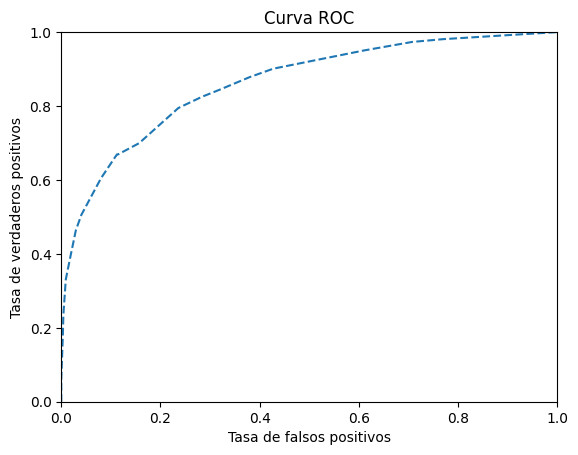

Valor del AUC-ROC 0.8620257260739422


In [36]:
#Calculamos la probabilidad de que cada observacion pertenezca a cada clase posible
probabilities_valid_tree_down = decision_tree_best_model_downsample.predict_proba(features_valid)
probabilities_one_valid_tree_down = probabilities_valid_tree_down[:, 1]

#Trazamos la grafica de la curva roc con la fucion roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree_down)

plt.figure()

#Curva ROC para el modelo, trazamos la grafica con las variables fpr (valores TFP) y tpr (valores TVP)
plt.plot(fpr, tpr, linestyle='--')

#Establecemos el límite para los ejes de 0 a 1
plt.xlim([0, 1])
plt.ylim([0, 1])

#Nombramos los ejes y al titulo
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")

plt.show()

#Mediante la funcion roc_auc_score obtenemos el valor del area bajo la curva roc (AUC-ROC)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_tree_down)

print("Valor del AUC-ROC", auc_roc)

## Bosque Aleatorio (Submuestreo)

In [37]:
random_forest_best_model_downsample = None
best_result_forest_downsample = 0
best_est_forest_downsample = 0
best_depth_forest_downsample = 0
# seleccionamos el rango del hiperparámetro, estimadores de 10 a 50, de 10 en 10
# y la profundidad de 1 a 10
for est in range(10, 51, 10):
    for depth in range (1, 11):
        # configuramos la aleatoriedad, los estimadores y la profundidad maxima del bosque aleatorio con los parámetros random_state=12345, n_estimators=est y max_depth=depth
        model_random_forest_downsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
        model_random_forest_downsample.fit(features_downsampled, target_downsampled)
        # realizamos la prediccion con las caracteristicas de validacion
        valid_predictions = model_random_forest_downsample.predict(features_valid)
        # calculamos la puntuación de f1 en el conjunto de validacion
        result = f1_score(target_valid, valid_predictions)
        print("F1 de modelo para los n_estimators de", est, ", depth=", depth, "es: ", result, "\n")
        # evaluamos que modelo tiene el mejor resultado (f1) y lo almacenamos, junto con los estimadores y la profundidad de ese arbol
        if result > best_result_forest_downsample:
            random_forest_best_model_downsample = model_random_forest_downsample
            best_result_forest_downsample = result
            best_est_forest_downsample = est
            best_depth_forest_downsample = depth

print(f"El F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth_forest_downsample} y n_estimators = {best_est_forest_downsample}): {best_result_forest_downsample}")

F1 de modelo para los n_estimators de 10 , depth= 1 es:  0.24422442244224424 

F1 de modelo para los n_estimators de 10 , depth= 2 es:  0.5775656324582339 

F1 de modelo para los n_estimators de 10 , depth= 3 es:  0.6236559139784946 

F1 de modelo para los n_estimators de 10 , depth= 4 es:  0.6324435318275154 

F1 de modelo para los n_estimators de 10 , depth= 5 es:  0.6208251473477406 

F1 de modelo para los n_estimators de 10 , depth= 6 es:  0.6133333333333333 

F1 de modelo para los n_estimators de 10 , depth= 7 es:  0.6588693957115009 

F1 de modelo para los n_estimators de 10 , depth= 8 es:  0.6444444444444445 

F1 de modelo para los n_estimators de 10 , depth= 9 es:  0.6245353159851301 

F1 de modelo para los n_estimators de 10 , depth= 10 es:  0.6210720887245841 

F1 de modelo para los n_estimators de 20 , depth= 1 es:  0.18556701030927836 

F1 de modelo para los n_estimators de 20 , depth= 2 es:  0.5747663551401869 

F1 de modelo para los n_estimators de 20 , depth= 3 es:  0.61

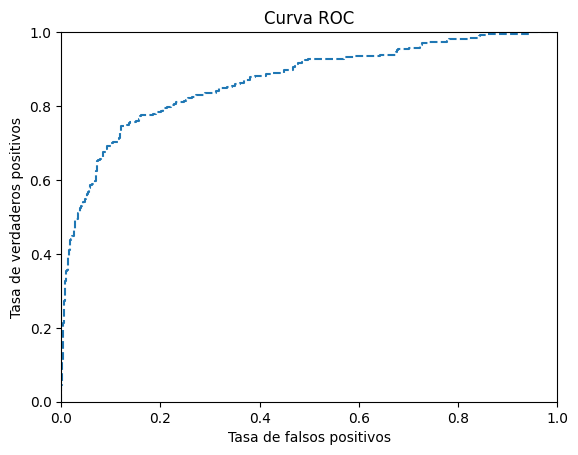

Valor del AUC-ROC 0.8680874178002242


In [38]:
#Calculamos la probabilidad de que cada observacion pertenezca a cada clase posible
probabilities_valid_forest_downsample = random_forest_best_model_downsample.predict_proba(features_valid)
probabilities_one_valid_forest_downsample = probabilities_valid_forest_downsample[:, 1]

#Trazamos la grafica de la curva roc con la fucion roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest_downsample)

plt.figure()

#Curva ROC para el modelo, trazamos la grafica con las variables fpr (valores TFP) y tpr (valores TVP)
plt.plot(fpr, tpr, linestyle='--')

#Establecemos el límite para los ejes de 0 a 1
plt.xlim([0, 1])
plt.ylim([0, 1])

#Nombramos los ejes y al titulo
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")

plt.show()

#Mediante la funcion roc_auc_score obtenemos el valor del area bajo la curva roc (AUC-ROC)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_forest_downsample)

print("Valor del AUC-ROC", auc_roc)

## Regresion Logistica (Submuestreo)

In [39]:
# creamos el modelo, configuramos la aleatoriedad y ajustamos el algoritmo solver a liblinear
model_logistic_regression_downsample = LogisticRegression(random_state=12345, solver='liblinear')
# entrenamos el modelo con las caracteristicas y el objetivo de entrenamiento
model_logistic_regression_downsample.fit(features_log_downsampled, target_log_downsampled)
# realizamos la prediccion con las caracteristicas de validacion
valid_predictions_log_downsampled = model_logistic_regression_downsample.predict(features_valid_scaled)
result_log_down = f1_score(target_valid, valid_predictions_log_downsampled)
print("F1 del modelo de regresión logística en el conjunto de validación:", result_log_down)

F1 del modelo de regresión logística en el conjunto de validación: 0.515358361774744


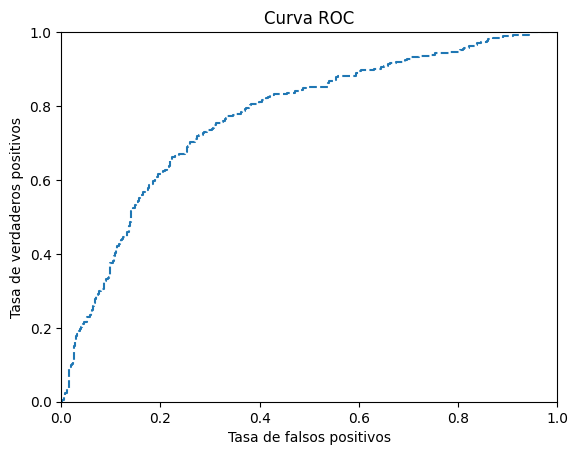

Valor del AUC-ROC 0.7689545845034883


In [40]:
#Calculamos la probabilidad de que cada observacion pertenezca a cada clase posible
probabilities_valid_log_down = model_logistic_regression_downsample.predict_proba(features_valid_scaled)
probabilities_one_valid_log_down = probabilities_valid_log_down[:, 1]

#Trazamos la grafica de la curva roc con la fucion roc_curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_log_down)

plt.figure()

#Curva ROC para el modelo, trazamos la grafica con las variables fpr (valores TFP) y tpr (valores TVP)
plt.plot(fpr, tpr, linestyle='--')

#Establecemos el límite para los ejes de 0 a 1
plt.xlim([0, 1])
plt.ylim([0, 1])

#Nombramos los ejes y al titulo
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")

plt.show()

#Mediante la funcion roc_auc_score obtenemos el valor del area bajo la curva roc (AUC-ROC)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_log_down)

print("Valor del AUC-ROC", auc_roc)

### Conclusiones

Al aplicar la tecnica del submuestreo obtenemos lo siguiente:

* Arbol de decision: El cual se utilizaron valores de profundidad del arbol de 1 a 10, siendo la profundidad 5 con el mejor valor F1 en los datos validacion de 0.64 y con un valor de AUC-ROC de 0.8620

* Bosque aleatorio: El cual se utilizaron valores de profundidad de 1 a 10 con estimadores de 10 a 50 y de 10 en 10, siendo la profundidad 7 y el estimador 40 con el mejor valor F1 en los datos validacion de 0.6731 y con un valor de AUC-ROC de 0.8680

* Regresion logistica: El cual se utilizo con el parametro solver='liblinear' al tratarse de clasificacion binaria y se obtuvo el valor F1 en los datos validacion de 0.5153 y con un valor de AUC-ROC de 0.7689

En esta ocasion podemos observar como los modelos de arbol de decisiones y bosque aleatorio pasaron al obenter un valor F1 mayor a 0.59, con 0.64 y 0.6731 respectivamente. Siendo el modelo de regresion logistica como el unico que no obtuvo una puntuacion mayor a 0.59 siendo 0.5153. En general se observa un incremento en los valores F1 de los modelos tras el submuestreo, mostrando como el modelo de bosque aleatorio tiene la mayor puntuacion y ademas tambien teniendo el mayor valor AUC-ROC que los demas con una puntacion de AUC-ROC de 0.8680

# Etapa 8. Pruebas de calidad de los modelos<a id='model_test'></a>

## Arbol de Decision

In [41]:
valid_predictions_tree_upsample = decision_tree_best_model_upsample.predict(features_test)
result_tree_upsample = f1_score(target_test, valid_predictions_tree_upsample)
print("Valor F1 de sobremuestreo: ", result_tree_upsample)

valid_predictions_tree_downsample = decision_tree_best_model_downsample.predict(features_test)
result_tree_downsample = f1_score(target_test, valid_predictions_tree_downsample)
print("Valor F1 de submuestreo: ", result_tree_downsample)


Valor F1 de sobremuestreo:  0.6081081081081081
Valor F1 de submuestreo:  0.6069469835466179


## Bosque Aleatorio

In [42]:
test_predictions_forest_upsample = random_forest_best_model_upsample.predict(features_test)
result_forest_upsample = f1_score(target_test, test_predictions_forest_upsample)
print("Valor F1 de sobremuestreo: ", result_forest_upsample)

test_predictions_forest_downsample = random_forest_best_model_downsample.predict(features_test)
result_forest_downsample = f1_score(target_test, test_predictions_forest_downsample)
print("Valor F1 de submuestreo: ", result_forest_downsample)


Valor F1 de sobremuestreo:  0.6143106457242583
Valor F1 de submuestreo:  0.6292134831460674


## Regresion Logistica

In [43]:
test_predictions_log_upsample = model_logistic_regression_upsample.predict(features_test_scaled)
result_log_upsample = f1_score(target_test, test_predictions_log_upsample)
print("Valor F1 de sobremuestreo: ", result_log_upsample)

test_predictions_log_downsample = model_logistic_regression_downsample.predict(features_test_scaled)
result_log_downsample = f1_score(target_test, test_predictions_log_downsample)
print("Valor F1 de submuestreo: ", result_log_downsample)


Valor F1 de sobremuestreo:  0.49455676516329705
Valor F1 de submuestreo:  0.4699828473413379


De igual forma como sucedio con los datos de validación, en el caso de los datos de prueba podemos observar como el modelo de bosque aleatorio con el enfoque de submuestreo para la correción del desequilibrio de clases tiene el mayor valor de la metrica F1 ante todos los demas modelos y mayor que 0.59, teniendo un valor de 0.6292, e inclusive mayor que el enfoque de sobremuestreo.

Y al obtener la curva ROC y el valor AUC-ROC observamos lo siguiente:

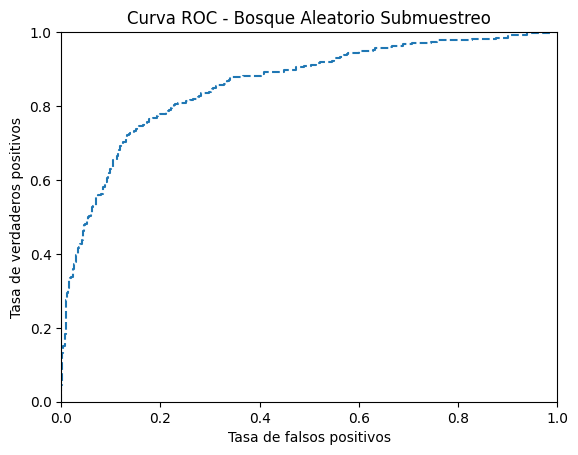

Valor del AUC-ROC 0.8582528870443883


In [44]:
#Calculamos la probabilidad de que cada observacion pertenezca a cada clase posible
probabilities_test_forest_downsample = random_forest_best_model_downsample.predict_proba(features_test)
probabilities_one_test_forest_downsample = probabilities_test_forest_downsample[:, 1]

#Trazamos la grafica de la curva roc con la fucion roc_curve
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_forest_downsample)

plt.figure()

#Curva ROC para el modelo, trazamos la grafica con las variables fpr (valores TFP) y tpr (valores TVP)
plt.plot(fpr, tpr, linestyle='--')

#Establecemos el límite para los ejes de 0 a 1
plt.xlim([0, 1])
plt.ylim([0, 1])

#Nombramos los ejes y al titulo
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos") 
plt.title("Curva ROC - Bosque Aleatorio Submuestreo")

plt.show()

#Mediante la funcion roc_auc_score obtenemos el valor del area bajo la curva roc (AUC-ROC)
auc_roc = roc_auc_score(target_test, probabilities_one_test_forest_downsample)

print("Valor del AUC-ROC", auc_roc)

### Conclusiones

Tras realizar la prediccion de los modelos pero con los datos de pruebas podemos observar como el modelo de bosque aleatorio y con la tecnica de submuestreo tiene el valor de la metrica de F1 mas alta ante todos los demas modelos siendo de 0.6292134831460674 siendo un valor F1 muy similar a la de la prediccion en los datos de validacion (0.6731898238747553) con una diferencia de 0.0439763407286879 siendo una poca diferencia y sugiriendo una mejoria en el modelo en contraposicion del modelo antes de alguna tecnica para manejar el desequilibrio de clases.

De igual forma podemos observar la curva ROC y el AUC-ROC teniendo este un valor de 0.8582528870443883, siendo considerablemente alto.

[Volver a Contenidos](#back)

# Etapa 9. Prueba de cordura<a id='sanity_test'></a>

In [45]:
#generamos una prediccion constante, donde se predice siempre la clase 0
target_pred_constant = pd.Series(0, index=target_test.index)
# evaluamos la metrica f1 de la predicción constante y del modelo
print("F1 de la prueba de cordura (predicción constante 0):", f1_score(target_test, target_pred_constant))
print("F1 del modelo Random Forest en el conjunto de prueba:", f1_score(target_test, test_predictions_forest_downsample))

F1 de la prueba de cordura (predicción constante 0): 0.0
F1 del modelo Random Forest en el conjunto de prueba: 0.6292134831460674


In [46]:
#generamos una prediccion constante, donde se predice siempre la clase 1
target_pred_constant = pd.Series(1, index=target_test.index)
# evaluamos la metrica f1 de la predicción constante y del modelo
print("F1 de la prueba de cordura (predicción constante 1):", f1_score(target_test, target_pred_constant))
print("F1 del modelo Random Forest en el conjunto de prueba:", f1_score(target_test, test_predictions_forest_downsample))

F1 de la prueba de cordura (predicción constante 1): 0.35742444152431013
F1 del modelo Random Forest en el conjunto de prueba: 0.6292134831460674


In [47]:
# generamos predicciones aleatorias (0 o 1) con el mismo tamaño de target_test
random_predictions = np.random.choice([0, 1], size=len(target_test))

# entrenamos y evaluamos el modelo real
predictions_test = random_forest_best_model_downsample.predict(features_test)

# evaluamos la metrica f1 de la predicción aleatoria y del modelo
f1_random = f1_score(target_test, random_predictions)
f1_real = f1_score(target_test, predictions_test)

print("F1 de la prueba de cordura (predicción aleatoria):", f1_random)
print("F1 del modelo Random Forest en el conjunto de prueba:", f1_real)

F1 de la prueba de cordura (predicción aleatoria): 0.3122923588039867
F1 del modelo Random Forest en el conjunto de prueba: 0.6292134831460674


### Conclusiones

Podemos observar como el valor de F1 de las predicciones con los datos constantes(0 y 1) son de 0.0 y de 0.357420 y la prediccion de los datos de prueba del modelo es de 0.62921 siendo mucho mayor que la prediccion con los datos constantes significando que el modelo es superior. De igual forma al tambien realizar una prueba de datos aleatorio vemos que el valor de F1 es de 0.31229 y la prediccion de los datos de prueba del modelo es de igual 0.62921 significando que el modelo es superior ante la prediccion de datos aleatorios, reafirmando que el modelo esta aprendiendo y mejorando gracias a todo este proceso.

[Volver a Contenidos](#back)

## Conclusión general <a id='end'></a>

Tras haber realizado y completado cada uno de los pasos de este proyecto desde el analisis exploratorio, la separacion de los conjuento de datos de entrenamiento, validacion y pruebas de los cuales fue 75%, 12.5% y 12.5%, el entrenamiento y evaluacion de los modelos hasta la prueba de cordura, mencionando como el mejor modelo resulto ser el de bosque aleatorio con una profundidad de 7 y estimadores de 40. Tambien mencionando como los valores de la metrica F1 ante las predicciones con los datos de validacion y de prueba fueron muy similares, mostrandonos igual como el modelo se comporta diferente ante datos aleatorios y constantes en la prueba de cordura resultando en 0.0, 0.35742 y 0.31229 de F1 siendo la prediccion de datos de prueba con un valor F1 de 0.62921 muy superior.

De igual forma resaltando las tecnicas de sobremuestreo y submuestreo para el desiquilibrio de clases las cuales fueron de gran ayuda para la mejora del modelo y que el valor F1 sea mayor a 0.59.

[Volver a Contenidos](#back)